Made by: Andrei Kulchyk (155489) and Fiodar Piatrovich (155174)

[Github](https://github.com/aaakulchyk/put-evolutionary-computations)

# Description of a problem

We are given three columns of integers with a row for each node. The first two columns contain x and y coordinates of the node positions in a plane. The third column contains node costs. The goal is to select exactly 50% of the nodes (if the number of nodes is odd we round the number of nodes to be selected up) and form a Hamiltonian cycle (closed path) through this set of nodes such that the sum of the total length of the path plus the total cost of the selected nodes is minimized.

The distances between nodes are calculated as Euclidean distances rounded mathematically to
integer values. The distance matrix should be calculated just after reading an instance and then only
the distance matrix (no nodes coordinates) should be accessed by optimization methods to allow
instances defined only by distance matrices.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path

import pandas as pd
from joblib import Parallel, delayed

from hamiltonian_cycle.algorithms.lab7 import LargeNeighborhoodSearch
from hamiltonian_cycle.costs import dm, function_cost
from hamiltonian_cycle.plots import plot_solution

In [4]:
def read_dataset_csv(csv_path: Path) -> pd.DataFrame:
    return pd.read_csv(csv_path, sep=";", names=["x", "y", "cost"])


DATA_DIR = Path("../data").resolve()

ds_a = read_dataset_csv(DATA_DIR / "TSPA.csv")
ds_b = read_dataset_csv(DATA_DIR / "TSPB.csv")

dm_a = dm(ds_a)
dm_b = dm(ds_b)

# LNS

## Pseudocode

**Algorithm: LargeNeighborhoodSearch**

1.  start_time ← current_time()
2.  num_iterations ← 0
3.  best_s ← LocalSearch(InitRandomSolution(ds, dm))
4.  best_cost ← Cost(best_s)
5.  while current_time() - start_time < max_runtime:
    1. num_iterations ← num_iterations + 1
    2. s' ← Repair(ds, dm, w_cost, w_regret, Destroy(best_s))
    3. if apply_local_search: s' ← LocalSearch(s')
    4. if Cost(s') < best_cost: best_s, best_cost ← s', Cost(s')
6. return best_s, num_iterations

**Destroy Operation**

1. (segment_length, k_segments) ← `GenerateRandomSegmentsParams(length(solution), min_percentage=0.2, max_percentage=0.3)`
2. longest_segments ← `FindKLongestSegments(dm, solution, segment_length, k_segments)`
3. destroyed_solution ← `EliminateSegments(solution, longest_segments)`
4. return destroyed_solution

## Results with LS

### Dataset A

In [ ]:
class LNSMetrics:
    def __init__(self, solution: pd.DataFrame, num_iterations: float):
        self.cost = function_cost(solution)
        self.solution = list(solution.index)
        self.num_iterations = num_iterations


def run_lns(lns: LargeNeighborhoodSearch) -> LNSMetrics:
    lns_solution, num_iterations = lns()
    return LNSMetrics(lns_solution, num_iterations)

In [ ]:
max_runtime_sec = 2200
lns_a = LargeNeighborhoodSearch(
    ds=ds_a,
    dm=dm_a,
    max_runtime=max_runtime_sec,
    w_cost=0.5,
    w_regret=0.5,
    apply_local_search=True,
)
lns_runs = 20

metrics: list[LNSMetrics] = Parallel(n_jobs=-1)(
    delayed(run_lns)(lns_a) for _ in range(lns_runs)
)

minimum = min(metrics, key=lambda x: x.cost)
mean = sum([metric.cost for metric in metrics]) / len(metrics)
maximum = max(metrics, key=lambda x: x.cost)
mean_n_iterations = sum([metric.num_iterations for metric in metrics]) / len(metrics)

Best solution: [144, 14, 106, 178, 49, 102, 62, 9, 148, 124, 94, 63, 79, 133, 80, 176, 137, 23, 186, 89, 183, 143, 0, 117, 93, 140, 108, 18, 22, 146, 159, 193, 41, 139, 68, 46, 115, 42, 181, 34, 160, 48, 54, 177, 10, 190, 4, 112, 84, 184, 43, 116, 65, 59, 118, 51, 151, 162, 123, 127, 70, 135, 154, 180, 53, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 16, 171, 175, 113, 31, 78, 145, 179, 92, 129, 57, 55, 52, 185, 165, 40, 196, 81, 90, 27, 164, 7, 21]
Objective function statistics:
minimum.cost = 69474
mean = 70179.05
maximum.cost= 71022
Mean Number of sucessfull perturbations: 3027.2


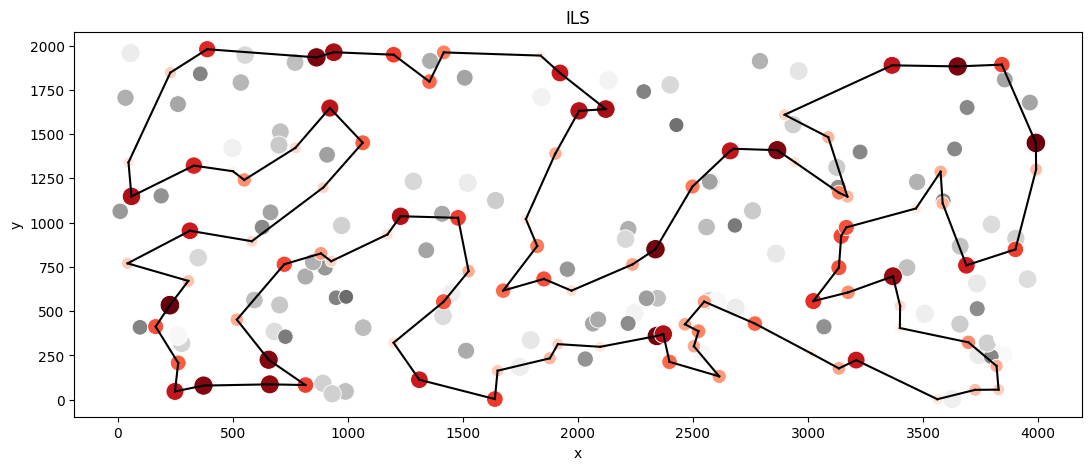

In [ ]:
print(f"Best solution: {minimum.solution}")
print("Objective function statistics:")
print(f"{minimum.cost = }\n{mean = }\n{maximum.cost= }")
print(f"Number of loop iterations: {mean_n_iterations}")
plot_solution(ds_a, minimum.solution, title="ILS")

### Dataset B

In [6]:
max_runtime_sec = 2200
lns_b = LargeNeighborhoodSearch(
    ds=ds_b,
    dm=dm_b,
    max_runtime=max_runtime_sec,
    w_cost=0.5,
    w_regret=0.5,
    apply_local_search=True,
)
lns_runs = 20

metrics: list[LNSMetrics] = Parallel(n_jobs=-1)(
    delayed(run_lns)(lns_b) for _ in range(lns_runs)
)

minimum = min(metrics, key=lambda x: x.cost)
mean = sum([metric.cost for metric in metrics]) / len(metrics)
maximum = max(metrics, key=lambda x: x.cost)
mean_n_iterations = sum([metric.num_iterations for metric in metrics]) / len(metrics)

Best solution: [11, 139, 168, 195, 13, 145, 15, 3, 70, 132, 169, 188, 6, 147, 90, 51, 121, 131, 122, 133, 107, 40, 63, 135, 38, 27, 1, 156, 198, 117, 193, 31, 54, 73, 136, 190, 80, 45, 175, 78, 5, 177, 36, 61, 91, 141, 77, 81, 153, 187, 163, 103, 89, 127, 137, 114, 113, 176, 194, 166, 86, 95, 130, 99, 185, 179, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 111, 82, 21, 8, 104, 144, 160, 33, 138, 182]
Objective function statistics:
minimum.cost = 43568
mean = 44290.55
maximum.cost= 45011
Mean Number of sucessfull perturbations: 3058.25


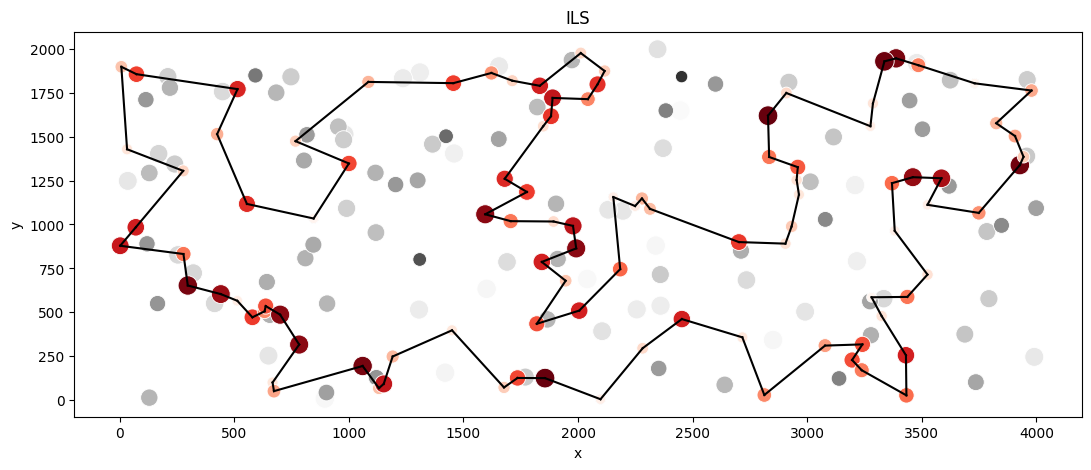

In [ ]:
print(f"Best solution: {minimum.solution}")
print("Objective function statistics:")
print(f"{minimum.cost = }\n{mean = }\n{maximum.cost= }")
print(f"Number of loop iterations: {mean_n_iterations}")
plot_solution(ds_b, minimum.solution, title="ILS")

## Results without LS

### Dataset A

In [ ]:
max_runtime_sec = 2200
lns_a = LargeNeighborhoodSearch(
    ds=ds_a,
    dm=dm_a,
    max_runtime=max_runtime_sec,
    w_cost=0.5,
    w_regret=0.5,
    apply_local_search=False,
)
lns_runs = 20

metrics: list[LNSMetrics] = Parallel(n_jobs=-1)(
    delayed(run_lns)(lns_a) for _ in range(lns_runs)
)

minimum = min(metrics, key=lambda x: x.cost)
mean = sum([metric.cost for metric in metrics]) / len(metrics)
maximum = max(metrics, key=lambda x: x.cost)
mean_n_iterations = sum([metric.num_iterations for metric in metrics]) / len(metrics)

Best solution: [116, 43, 42, 181, 34, 160, 48, 54, 177, 10, 190, 184, 35, 84, 4, 112, 127, 70, 135, 154, 180, 53, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 196, 81, 40, 90, 165, 185, 179, 92, 129, 57, 55, 52, 106, 178, 3, 14, 49, 102, 144, 62, 9, 148, 124, 94, 63, 79, 80, 176, 137, 23, 186, 89, 183, 143, 0, 117, 93, 140, 108, 18, 22, 146, 159, 193, 41, 139, 68, 46, 115, 59, 118, 51, 151, 133, 162, 123, 149, 65]
Objective function statistics:
minimum.cost = 69657
mean = 70494.5
maximum.cost= 71452
Mean Number of sucessfull perturbations: 6705.1


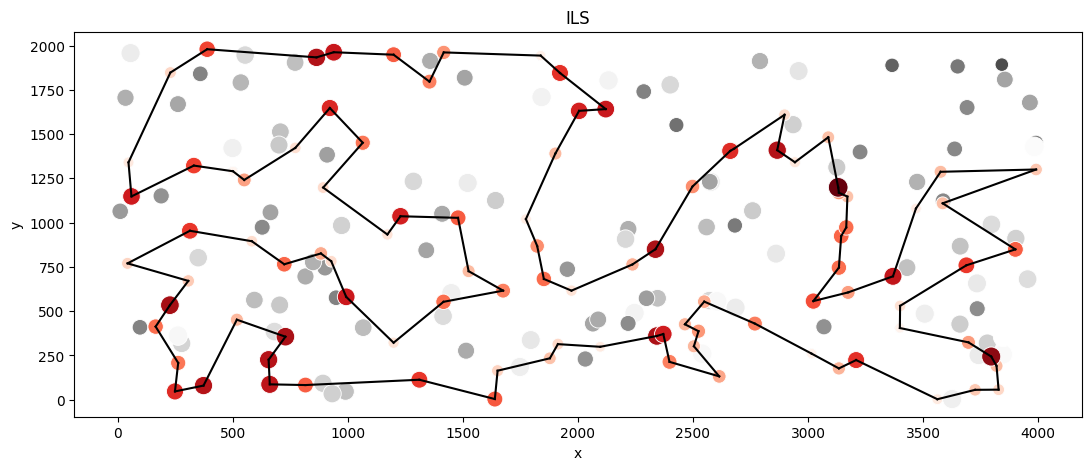

In [ ]:
print(f"Best solution: {minimum.solution}")
print("Objective function statistics:")
print(f"{minimum.cost = }\n{mean = }\n{maximum.cost= }")
print(f"Number of loop iterations: {mean_n_iterations}")
plot_solution(ds_a, minimum.solution, title="ILS")

### Dataset B

In [ ]:
max_runtime_sec = 2200
lns_b = LargeNeighborhoodSearch(
    ds=ds_b,
    dm=dm_b,
    max_runtime=max_runtime_sec,
    w_cost=0.5,
    w_regret=0.5,
    apply_local_search=False,
)
lns_runs = 20

metrics: list[LNSMetrics] = Parallel(n_jobs=-1)(
    delayed(run_lns)(lns_b) for _ in range(lns_runs)
)

minimum = min(metrics, key=lambda x: x.cost)
mean = sum([metric.cost for metric in metrics]) / len(metrics)
maximum = max(metrics, key=lambda x: x.cost)
mean_n_iterations = sum([metric.num_iterations for metric in metrics]) / len(metrics)

Best solution: [193, 54, 31, 73, 136, 190, 80, 162, 175, 78, 5, 177, 36, 61, 91, 141, 77, 81, 153, 187, 163, 103, 89, 127, 137, 114, 113, 180, 176, 194, 166, 86, 185, 95, 130, 99, 179, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 111, 82, 21, 8, 104, 144, 160, 33, 138, 11, 139, 168, 195, 13, 145, 15, 3, 70, 132, 169, 188, 6, 147, 90, 51, 121, 131, 122, 133, 107, 40, 63, 135, 38, 27, 1, 156, 198, 117]
Objective function statistics:
minimum.cost = 43595
mean = 44507.05
maximum.cost= 45558
Mean Number of sucessfull perturbations: 6717.85


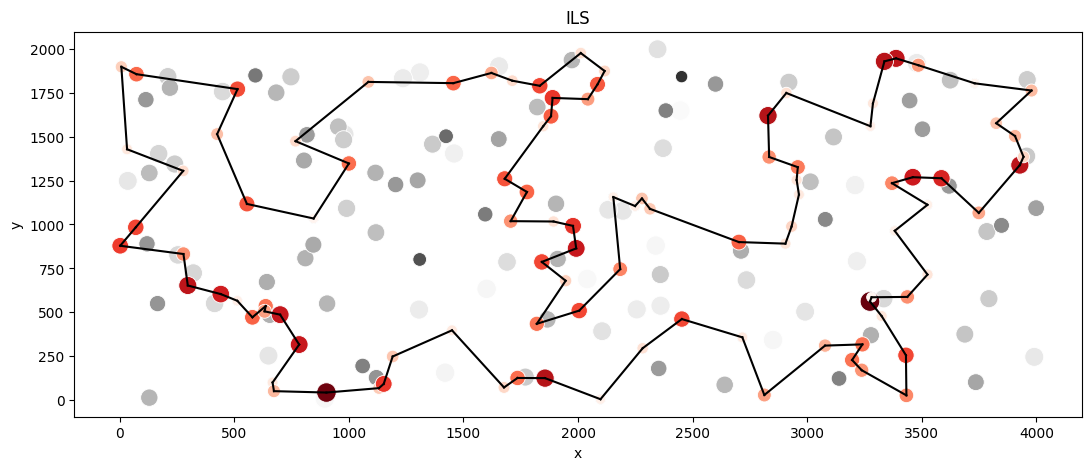

In [ ]:
print(f"Best solution: {minimum.solution}")
print("Objective function statistics:")
print(f"{minimum.cost = }\n{mean = }\n{maximum.cost= }")
print(f"Number of loop iterationss: {mean_n_iterations}")
plot_solution(ds_b, minimum.solution, title="ILS")

# Summary

In [15]:
a_res = pd.DataFrame(
    {
        "Steepest edge LS": [72046, 74033.715, 78801, 9.54, 1],
        "MLSM": [70662, 71267.4, 71693, 2223, 200],
        "ILS": [69107, 69326.15, 69765, 2223, 1106.2],
        "LNS with LS": [69474, 70179.05, 71022, 2223, 3027.2],
        "LNS without LS": [69657, 70494.5, 71452, 2223, 6705.1],
        "Greedy weighted cycle": [71057.0, 72218.320, 73587.0, 0.4, 1],
    },
    index=pd.MultiIndex.from_tuples(
        [
            ("Dataset A", "min"),
            ("Dataset A", "mean"),
            ("Dataset A", "max"),
            ("Dataset A", "seconds/instance"),
            ("Dataset A", "iterations"),
        ]
    ),
).T

b_res = pd.DataFrame(
    {
        "Steepest edge LS": [45393, 48264.78, 50697, 9.02, 1],
        "MLSM": [45321, 45751.25, 4613, 2218, 200],
        "ILS": [43493, 43783.05, 44312, 2218, 1114.8],
        "LNS with LS": [43568, 44290.55, 45011, 2218, 3058.25],
        "LNS without LS": [43595, 44507.05, 45558, 2218, 6717.85],
        "Greedy weighted cycle": [45453.0, 46252.105, 47884.0, 0.4, 1],
    },
    index=pd.MultiIndex.from_tuples(
        [
            ("Dataset B", "min"),
            ("Dataset B", "mean"),
            ("Dataset B", "max"),
            ("Dataset B", "seconds/instance"),
            ("Dataset B", "iterations"),
        ]
    ),
).T

a_res.join(b_res).sort_values(by=("Dataset A", "mean"))

Dataset A                                       \
                            min       mean      max seconds/instance   
ILS                     69107.0  69326.150  69765.0          2223.00   
LNS with LS             69474.0  70179.050  71022.0          2223.00   
LNS without LS          69657.0  70494.500  71452.0          2223.00   
MLSM                    70662.0  71267.400  71693.0          2223.00   
Greedy weighted cycle   71057.0  72218.320  73587.0             0.40   
Steepest edge LS        72046.0  74033.715  78801.0             9.54   

                                 Dataset B                      \
                      iterations       min       mean      max   
ILS                       1106.2   43493.0  43783.050  44312.0   
LNS with LS               3027.2   43568.0  44290.550  45011.0   
LNS without LS            6705.1   43595.0  44507.050  45558.0   
MLSM                       200.0   45321.0  45751.250   4613.0   
Greedy weighted cycle        1.0   45453.0  46252.105  47884.0   
Steepest edge LS             1.0   45393.0  48264.780  50697.0   

                                                   
                      seconds/instance iterations  
ILS                            2218.00    1114.80  
LNS with LS                    2218.00    3058.25  
LNS without LS                 2218.00    6717.85  
MLSM                           2218.00     200.00  
Greedy weighted cycle             0.40       1.00  
Steepest edge LS                  9.02       1.00

# Conclusion

We didn't manage to achieve better results with LNS than we achieved with ILS. However, our results of LNS with and without LS are almost similar, meaning that 2 times more destroy and repair operations have +- same effect as polishing with local seacrh.
Nevertheless, LNS, despite having the same time budget as MLSM resulted in smaller costs.